<a href="https://colab.research.google.com/github/Sahil-Jagadale/ML_PRACTICALS/blob/main/Problem_Statement_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("pima-indians-diabetes.csv")

In [5]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
columns = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

In [7]:
data.columns = columns

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [9]:
x = data.drop(columns=['Outcome'])
y = data['Outcome']

In [11]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [18]:
model = GaussianNB()

In [19]:
model.fit(x_train,y_train)

GaussianNB()

In [20]:
y_pred= model.predict(x_test)

In [21]:
accuracy = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:- ")
print(cr)

Accuracy: 0.7077922077922078
Classification Report:- 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       107
           1       0.52      0.53      0.53        47

    accuracy                           0.71       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.71      0.71      0.71       154



In [22]:
from sklearn.metrics import roc_curve,auc

In [24]:
y_prob = model.predict_proba(x_test)[:,-1]

In [29]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob)

In [30]:
roc_auc = auc(fpr,tpr)

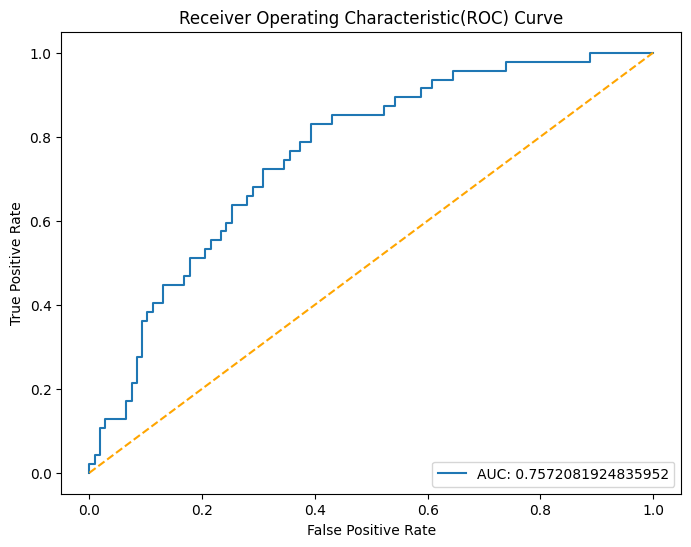

In [33]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"AUC: {roc_auc}")
plt.plot([0,1],[0,1],color="orange",linestyle="--")
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()